<a href="https://colab.research.google.com/github/ClausGB/courses/blob/master/TallerESCOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install numpy_financial

In [15]:
# graficos embebidos
import matplotlib.pyplot as plt
import numpy_financial as npf


In [11]:
# Ejemplo FV con python
# $1000 al 6% anual por 3 años.

# importando librerías
import numpy as np
import matplotlib.pyplot as plt

x = -1000  # deposito
r = .06    # tasa de interes
n = 3      # cantidad de años

# usando la funcion fv de numpy
FV = npf.fv(pv=x, rate=r, nper=n, pmt=0)
FV

1191.016

In [12]:
#Controlando el resultado
x * (1 + r)**n

-1191.016

In [14]:
# Graficando las funciones con interes de 6 y 12 % a 20 años.
t = list(range(0, 21))

def fv6(num):
    return npf.fv(pv=-1000, rate=r, pmt=0, nper=num)

def fv12(num):
    return npf.fv(pv=-1000, rate=.12, pmt=0, nper=num)

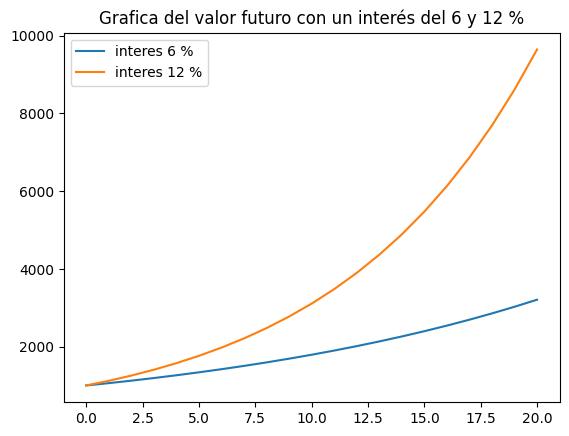

In [17]:

plt.title("Grafica del valor futuro con un interés del 6 y 12 %")
plt.plot(t, fv6(t), label="interes 6 %")
plt.plot(t, fv12(t), label="interes 12 %")
plt.legend(loc='upper left')
plt.show()

In [18]:
# Calculando el valor de la anualidad con 6% anual
x = -1000 # valor de depositos
r = .06   # tasa de interes
n = 10    # cantidad de años

# usando la funcion fv de numpy
FV = npf.fv(pv=0, rate=r, nper=n, pmt=x, when='begin')
FV


13971.642638923764

In [19]:
fv = 1000  # valor futuro
r = .06   # tasa de interes
n = 3     # cantidad de años

fv / ((1 + r)**n)

839.6192830323018

In [22]:
 #Calculando el valor futuro de los 839.62
npf.fv(pv=-839.62, rate=r, nper=n, pmt=0)

1000.00085392

In [24]:
# Calculando el valor de la anualidad
PV = npf.pv(fv=0, rate=r, nper=5, pmt=-250, when='end')
PV

1053.090946391429

In [26]:
# Calculando el NPV de la inversión de 4000.
NPV = npf.npv(rate=.06, values=[-4000, 500, 750, 1000, 1250, 500])
NPV

-657.4391082689172

In [28]:
# Calculando la tasa interna de retorno de la inversion en la compañía
IRR = npf.irr([-1000, 300, 300, 300, 300])
IRR * 100

7.713847295208343

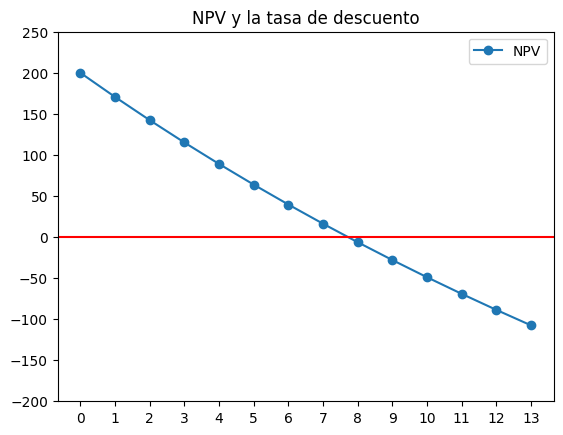

In [30]:
# Graficando el NPV en función de la tasa de descuento
def npv_irr(tasas):
    result = []
    for tasa in tasas:
        result.append(npf.npv(tasa/100,[-1000, 300, 300, 300, 300] ))
    return result

tasas = list(range(14))

plt.title("NPV y la tasa de descuento")
plt.plot(tasas, npv_irr(tasas), marker='o', label='NPV')
plt.axhline(0, color='red')
axes = plt.gca()
axes.set_ylim([-200,250])
plt.xticks(tasas)
plt.legend(loc='upper right')
plt.show()

In [117]:
# Importando pandas y datetime
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['GOOGL', 'AAPL','TSLA']
from datetime import datetime
startdate = datetime(2023,1,1)
enddate = datetime(2023,12,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
data

[*********************100%%**********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker            AAPL       GOOGL        TSLA        AAPL       GOOGL   
Date                                                                     
2023-01-03  124.216309   89.120003  108.099998  125.070000   89.120003   
2023-01-04  125.497498   88.080002  113.639999  126.360001   88.080002   
2023-01-05  124.166641   86.199997  110.339996  125.019997   86.199997   
2023-01-06  128.735245   87.339996  113.059998  129.619995   87.339996   
2023-01-09  129.261627   88.019997  119.769997  130.149994   88.019997   
...                ...         ...         ...         ...         ...   
2023-12-08  195.460587  134.990005  243.839996  195.710007  134.990005   
2023-12-11  192.933807  133.289993  239.740005  193.179993  133.289993   
2023-12-12  194.461868  132.520004  237.009995  194.710007  132.520004   
2023-12-13  197.707718  132.570007  239.289993  197.960007  132.570007   
2023-12-14  197.857529  131.940002  251.050003  198.110001  131.940002   

Price                         High                                 Low  \
Ticker            TSLA        AAPL       GOOGL        TSLA        AAPL   
Date                                                                     
2023-01-03  108.099998  130.899994   91.050003  118.800003  124.169998   
2023-01-04  113.639999  128.660004   90.650002  114.589996  125.080002   
2023-01-05  110.339996  127.769997   87.570000  111.750000  124.760002   
2023-01-06  113.059998  130.289993   87.690002  114.389999  124.889999   
2023-01-09  119.769997  133.410004   90.050003  123.519997  129.889999   
...                ...         ...         ...         ...         ...   
2023-12-08  243.839996  195.990005  136.399994  245.270004  193.669998   
2023-12-11  239.740005  193.490005  133.339996  243.440002  191.419998   
2023-12-12  237.009995  194.720001  133.000000  238.990005  191.720001   
2023-12-13  239.289993  198.000000  133.500000  240.300003  194.850006   
2023-12-14  251.050003  199.619995  133.720001  253.880005  196.160004   

Price                                     Open                          \
Ticker           GOOGL        TSLA        AAPL       GOOGL        TSLA   
Date                                                                     
2023-01-03   88.519997  104.639999  130.279999   89.589996  118.470001   
2023-01-04   87.269997  107.519997  126.889999   90.349998  109.110001   
2023-01-05   85.900002  107.160004  127.129997   87.470001  110.510002   
2023-01-06   84.860001  101.809998  126.010002   86.790001  103.000000   
2023-01-09   87.860001  117.110001  130.470001   88.360001  118.959999   
...                ...         ...         ...         ...         ...   
2023-12-08  134.029999  239.270004  194.199997  134.199997  240.270004   
2023-12-11  131.360001  237.449997  193.110001  132.380005  242.740005   
2023-12-12  131.259995  233.869995  193.080002  131.809998  238.550003   
2023-12-13  131.570007  228.199997  195.089996  133.380005  234.190002   
2023-12-14  129.690002  240.789993  198.020004  133.380005  241.220001   

Price          Volume                       
Ticker           AAPL     GOOGL       TSLA  
Date                                        
2023-01-03  112117500  28131200  231402800  
2023-01-04   89113600  34854800  180389000  
2023-01-05   80962700  27194400  157986300  
2023-01-06   87754700  41381500  220911100  
2023-01-09   70790800  29003900  190284000  
...               ...       ...        ...  
2023-12-08   53377300  32233900  102980100  
2023-12-11   60943700  31138000   97913900  
2023-12-12   52696900  29032800   95328300  
2023-12-13   70404200  30104800  146286300  
2023-12-14   66831600  38722400  160829200  

[240 rows x 18 columns]

In [118]:
data.describe()

Price    Adj Close                               Close              \
Ticker        AAPL       GOOGL        TSLA        AAPL       GOOGL   
count   240.000000  240.000000  240.000000  240.000000  240.000000   
mean    170.967081  117.964875  215.967166  171.630959  117.964875   
std      17.215024   15.961113   42.104465   17.078783   15.961113   
min     124.166641   86.199997  108.099998  125.019997   86.199997   
25%     159.787113  104.442501  185.405003  160.640003  104.442501   
50%     174.409355  122.660000  219.245003  174.959999  122.660000   
75%     184.215023  131.535000  251.459999  184.830002  131.535000   
max     197.857529  140.550003  293.339996  198.110001  140.550003   

Price                     High                                 Low  \
Ticker        TSLA        AAPL       GOOGL        TSLA        AAPL   
count   240.000000  240.000000  240.000000  240.000000  240.000000   
mean    215.967166  172.940750  119.207625  220.092584  170.033625   
std      42.104465   17.005906   16.029218   42.640482   17.252444   
min     108.099998  127.769997   87.570000  111.750000  124.169998   
25%     185.405003  162.052498  105.594999  188.815002  159.672501   
50%     219.245003  176.215004  124.074997  222.584999  173.464996   
75%     251.459999  186.532505  132.599998  256.684990  183.564999   
max     293.339996  199.619995  141.220001  299.290009  196.160004   

Price                                 Open                          \
Ticker       GOOGL        TSLA        AAPL       GOOGL        TSLA   
count   240.000000  240.000000  240.000000  240.000000  240.000000   
mean    116.565292  211.076750  171.300292  117.721417  215.473417   
std      15.982427   41.936114   17.236899   16.069247   42.399706   
min      84.860001  101.809998  126.010002   85.980003  103.000000   
25%     103.107502  181.742496  160.900002  104.179998  184.934994   
50%     121.555000  214.315002  174.395004  122.805000  218.775002   
75%     129.927505  244.897499  184.532501  131.350006  250.055004   
max     138.580002  289.519989  198.020004  141.050003  296.040009   

Price         Volume                              
Ticker          AAPL         GOOGL          TSLA  
count   2.400000e+02  2.400000e+02  2.400000e+02  
mean    5.954167e+07  3.291245e+07  1.384838e+08  
std     1.721956e+07  1.325284e+07  3.593850e+07  
min     2.404830e+07  1.251430e+07  6.512520e+07  
25%     4.838410e+07  2.524055e+07  1.123929e+08  
50%     5.562570e+07  2.960290e+07  1.301598e+08  
75%     6.592160e+07  3.629012e+07  1.598709e+08  
max     1.543573e+08  1.194550e+08  3.065906e+08

In [119]:
data.Close['AAPL']
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2023-01-03 to 2023-12-14
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   240 non-null    float64
 1   (Adj Close, GOOGL)  240 non-null    float64
 2   (Adj Close, TSLA)   240 non-null    float64
 3   (Close, AAPL)       240 non-null    float64
 4   (Close, GOOGL)      240 non-null    float64
 5   (Close, TSLA)       240 non-null    float64
 6   (High, AAPL)        240 non-null    float64
 7   (High, GOOGL)       240 non-null    float64
 8   (High, TSLA)        240 non-null    float64
 9   (Low, AAPL)         240 non-null    float64
 10  (Low, GOOGL)        240 non-null    float64
 11  (Low, TSLA)         240 non-null    float64
 12  (Open, AAPL)        240 non-null    float64
 13  (Open, GOOGL)       240 non-null    float64
 14  (Open, TSLA)        240 non-null    float64
 15  (Volume, AAPL)      240 non-null    in

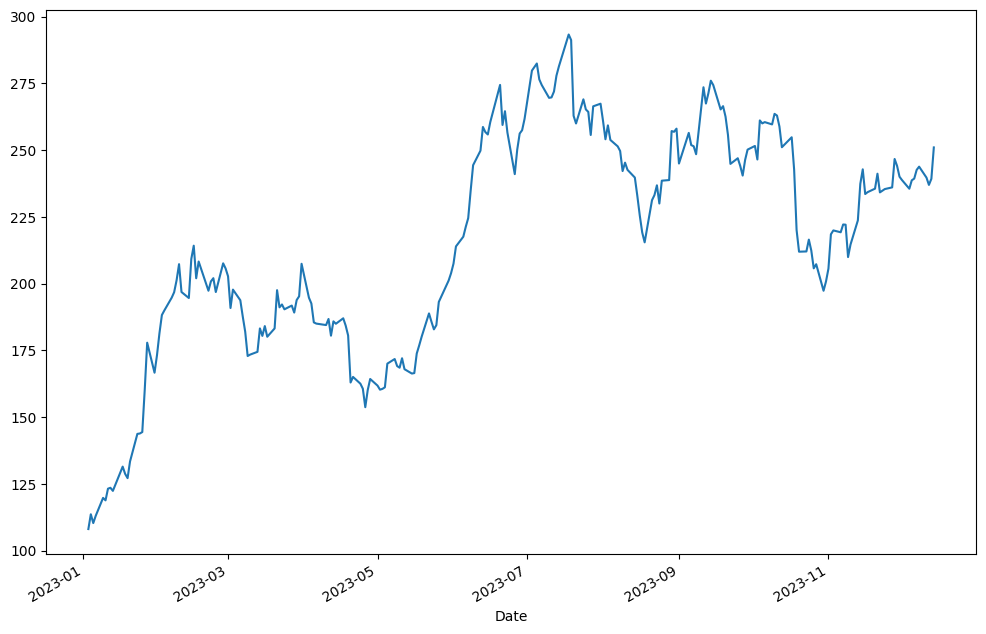

In [120]:
plot =data.Close['TSLA'].plot(figsize=(12,8))

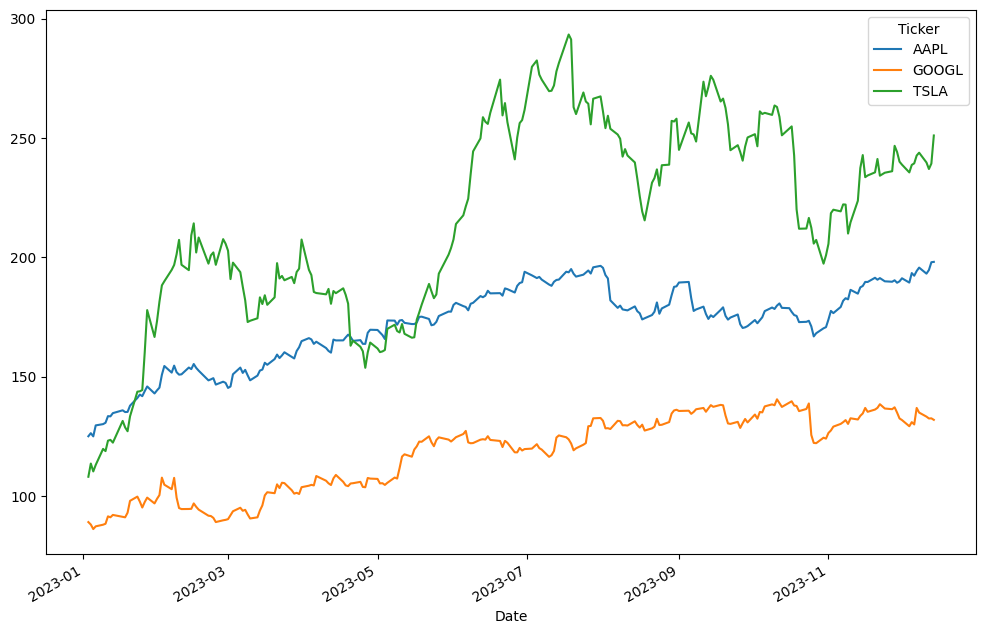

In [121]:
plot =data.Close.plot(figsize=(12,8))

In [122]:
data.cov()

Price                Adj Close                                     Close  \
Ticker                    AAPL         GOOGL          TSLA          AAPL   
Price     Ticker                                                           
Adj Close AAPL    2.963571e+02  2.323723e+02  5.963605e+02  2.939961e+02   
          GOOGL   2.323723e+02  2.547571e+02  5.116359e+02  2.295064e+02   
          TSLA    5.963605e+02  5.116359e+02  1.772786e+03  5.911855e+02   
Close     AAPL    2.939961e+02  2.295064e+02  5.911855e+02  2.916848e+02   
          GOOGL   2.323723e+02  2.547571e+02  5.116359e+02  2.295064e+02   
          TSLA    5.963605e+02  5.116359e+02  1.772786e+03  5.911855e+02   
High      AAPL    2.920261e+02  2.288126e+02  5.912242e+02  2.897259e+02   
          GOOGL   2.334248e+02  2.553098e+02  5.139513e+02  2.305615e+02   
          TSLA    6.000345e+02  5.156254e+02  1.788703e+03  5.948054e+02   
Low       AAPL    2.963641e+02  2.304941e+02  5.953770e+02  2.940363e+02   
          GOOGL   2.331754e+02  2.546247e+02  5.139598e+02  2.302963e+02   
          TSLA    5.957833e+02  5.096358e+02  1.759110e+03  5.906322e+02   
Open      AAPL    2.950618e+02  2.308339e+02  5.958930e+02  2.927249e+02   
          GOOGL   2.338544e+02  2.551303e+02  5.168745e+02  2.309631e+02   
          TSLA    5.974930e+02  5.111315e+02  1.767952e+03  5.922938e+02   
Volume    AAPL   -9.756848e+07 -6.119675e+07 -1.603174e+08 -9.661609e+07   
          GOOGL  -5.427485e+07 -6.752500e+07 -1.328040e+08 -5.325833e+07   
          TSLA   -3.421566e+08 -3.173356e+08 -5.949890e+08 -3.386115e+08   

Price                                                 High                \
Ticker                   GOOGL          TSLA          AAPL         GOOGL   
Price     Ticker                                                           
Adj Close AAPL    2.323723e+02  5.963605e+02  2.920261e+02  2.334248e+02   
          GOOGL   2.547571e+02  5.116359e+02  2.288126e+02  2.553098e+02   
          TSLA    5.116359e+02  1.772786e+03  5.912242e+02  5.139513e+02   
Close     AAPL    2.295064e+02  5.911855e+02  2.897259e+02  2.305615e+02   
          GOOGL   2.547571e+02  5.116359e+02  2.288126e+02  2.553098e+02   
          TSLA    5.116359e+02  1.772786e+03  5.912242e+02  5.139513e+02   
High      AAPL    2.288126e+02  5.912242e+02  2.892009e+02  2.306360e+02   
          GOOGL   2.553098e+02  5.139513e+02  2.306360e+02  2.569358e+02   
          TSLA    5.156254e+02  1.788703e+03  5.972266e+02  5.199147e+02   
Low       AAPL    2.304941e+02  5.953770e+02  2.927611e+02  2.320568e+02   
          GOOGL   2.546247e+02  5.139598e+02  2.300983e+02  2.557188e+02   
          TSLA    5.096358e+02  1.759110e+03  5.923125e+02  5.134596e+02   
Open      AAPL    2.308339e+02  5.958930e+02  2.924096e+02  2.328302e+02   
          GOOGL   2.551303e+02  5.168745e+02  2.312244e+02  2.569637e+02   
          TSLA    5.111315e+02  1.767952e+03  5.954835e+02  5.159844e+02   
Volume    AAPL   -6.119675e+07 -1.603174e+08 -8.954321e+07 -6.058071e+07   
          GOOGL  -6.752500e+07 -1.328040e+08 -5.219343e+07 -6.365492e+07   
          TSLA   -3.173356e+08 -5.949890e+08 -3.342926e+08 -3.149057e+08   

Price                                    Low                              \
Ticker                    TSLA          AAPL         GOOGL          TSLA   
Price     Ticker                                                           
Adj Close AAPL    6.000345e+02  2.963641e+02  2.331754e+02  5.957833e+02   
          GOOGL   5.156254e+02  2.304941e+02  2.546247e+02  5.096358e+02   
          TSLA    1.788703e+03  5.953770e+02  5.139598e+02  1.759110e+03   
Close     AAPL    5.948054e+02  2.940363e+02  2.302963e+02  5.906322e+02   
          GOOGL   5.156254e+02  2.304941e+02  2.546247e+02  5.096358e+02   
          TSLA    1.788703e+03  5.953770e+02  5.139598e+02  1.759110e+03   
High      AAPL    5.972266e+02  2.927611e+02  2.300983e+02  5.923125e+02   
          GOOGL   5.199147e+02  2.320568e+02  

In [126]:
data.Close['TSLA'].var()

1772.7859517117101

In [139]:
!pip install alpha_vantage

In [151]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
api_key ="E3W6AODXHAYGKM5V"
ts = TimeSeries(key=api_key,output_format='pandas',indexing_type='date')
#data, meta_data = ts.get_intraday(symbol='MSFT',interval='15min',outputsize='full')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='60min',outputsize='full')
print(data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2024-03-13 19:00:00  417.000   417.30  416.000   416.720    14755.0
2024-03-13 18:00:00  415.900   417.50  415.800   417.005    17595.0
2024-03-13 17:00:00  415.840   416.00  415.100   416.000    67496.0
2024-03-13 16:00:00  414.950   440.38  400.627   415.820  7081930.0
2024-03-13 15:00:00  416.073   416.20  413.910   415.230  2604839.0
...                      ...      ...      ...       ...        ...
2024-02-21 08:00:00  400.890   402.79  399.670   399.925   480244.0
2024-02-21 07:00:00  400.820   400.90  399.690   399.800    26187.0
2024-02-21 06:00:00  401.190   401.30  400.550   400.740     7199.0
2024-02-21 05:00:00  401.190   401.78  401.000   401.170     6643.0
2024-02-21 04:00:00  401.210   401.92  400.750   401.150    13899.0

[256 rows x 5 columns]


In [155]:
ts = TimeSeries(key=api_key,output_format='pandas',indexing_type='date')
#data, meta_data = ts.get_intraday(symbol='MSFT',interval='15min',outputsize='full')
diario, meta_data2 = ts.get_daily(symbol='MSFT',outputsize='full')
print(data)

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-03-13   418.10   418.18  411.45    415.10  16990048.0
2024-03-12   407.62   415.57  406.79    415.28  21563656.0
2024-03-11   403.76   405.68  401.26    404.52  15998511.0
2024-03-08   407.96   410.42  404.33    406.22  18002186.0
2024-03-07   406.12   409.78  402.24    409.14  18718479.0
...             ...      ...     ...       ...         ...
1999-11-05    91.81    92.87   90.50     91.56  35083700.0
1999-11-04    92.31    92.75   90.31     91.75  27119700.0
1999-11-03    92.94    93.50   91.50     92.00  22258500.0
1999-11-02    92.75    94.50   91.94     92.56  23174500.0
1999-11-01    93.25    94.19   92.12     92.37  26630600.0

[6130 rows x 5 columns]


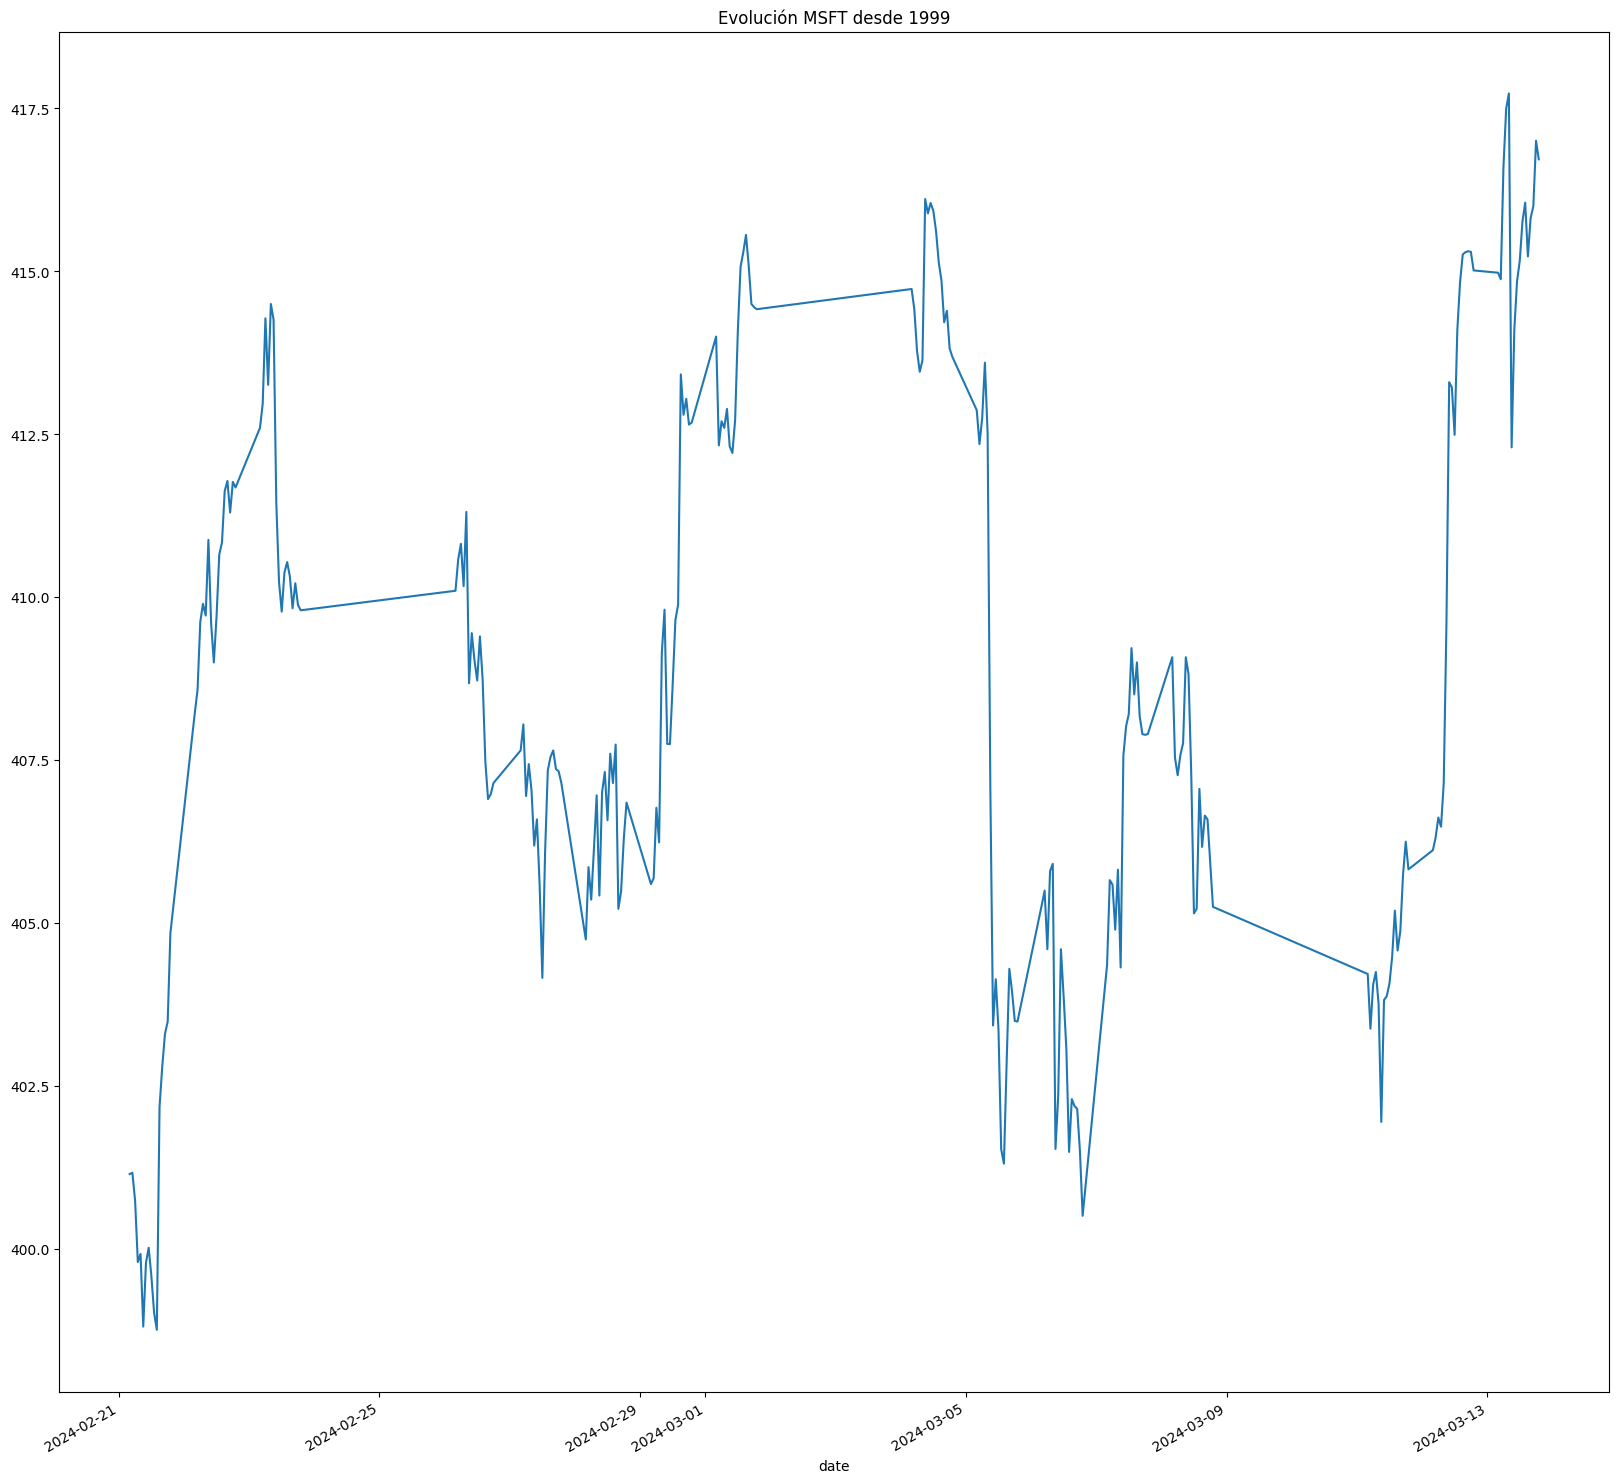

In [152]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
plt.figure  (figsize=(20,20))
data['4. close'].plot()
plt.title('Evolución MSFT desde 1999')
plt.show()

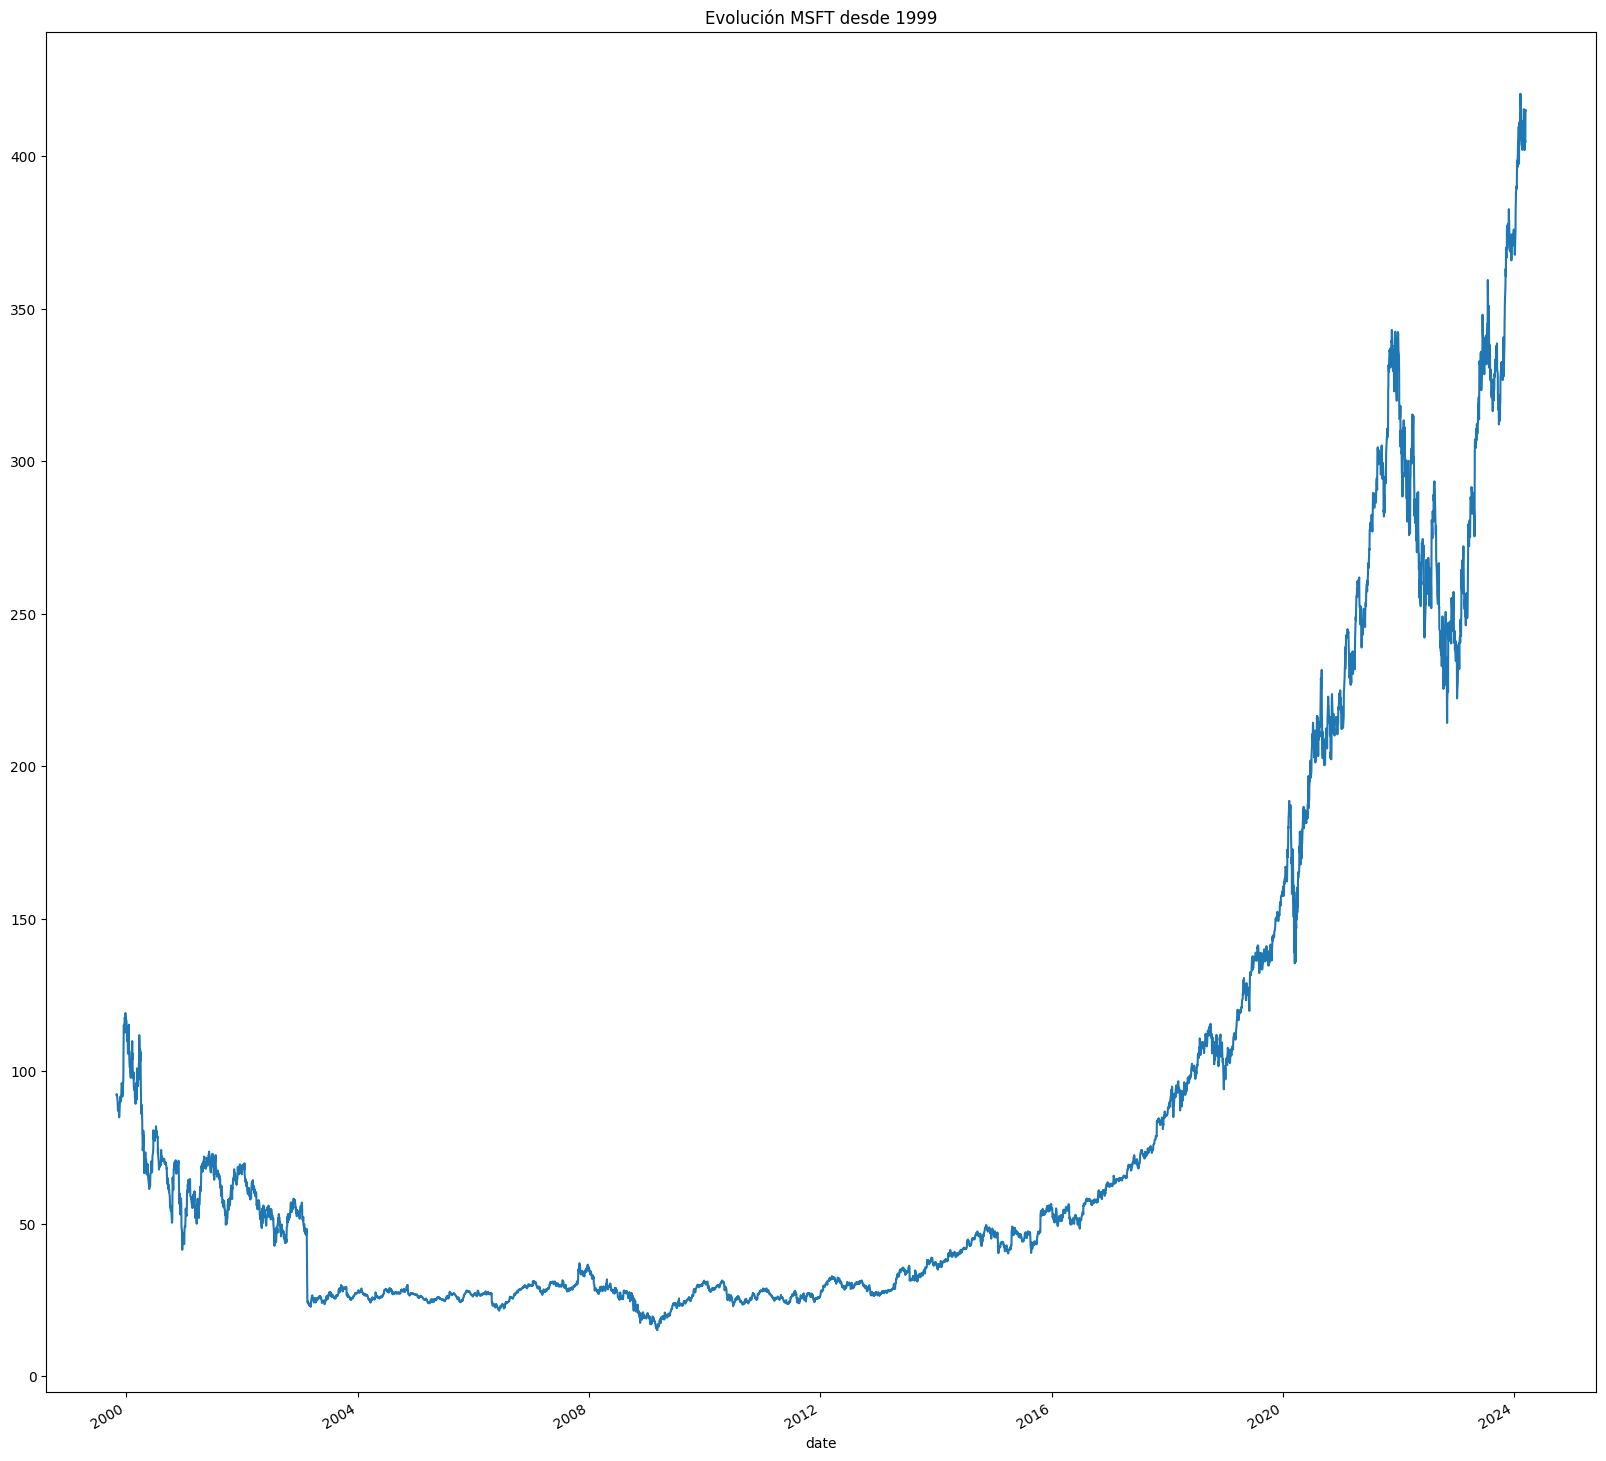

In [158]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
plt.figure  (figsize=(20,20))
diario['4. close'].plot()
plt.title('Evolución MSFT desde 1999')
plt.show()

In [165]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt
cc= CryptoCurrencies(key=api_key,output_format='pandas')
data, meta_data =cc.get_digital_currency_daily(symbol='BTC',market='CNY')
data

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2024-03-14,525069.037440,73072.40,525766.328064,73169.44,523518.528672,72856.62,523571.270976,72863.96,1042.961150,1042.961150
2024-03-13,513425.491200,71452.00,529221.236400,73650.25,512572.632336,71333.31,525069.109296,73072.41,52659.711647,52659.711647
2024-03-12,517924.395360,72078.10,524548.800000,73000.00,493081.764192,68620.82,513425.563056,71452.01,68783.546691,68783.546691
2024-03-11,495489.371328,68955.88,523111.680000,72800.00,481614.552576,67024.96,517924.395360,72078.10,75292.825726,75292.825726
2024-03-10,490871.904768,68313.28,502184.410416,69887.61,489301.635600,68094.75,495489.371328,68955.88,38404.668350,38404.668350
...,...,...,...,...,...,...,...,...,...,...
2021-06-23,233600.694336,32509.56,250640.913600,34881.00,227661.364800,31683.00,241997.139792,33678.07,126966.100563,126966.100563
2021-06-22,227166.420672,31614.12,239271.713568,33298.78,206981.208000,28805.00,233600.694336,32509.56,204208.179762,204208.179762
2021-06-21,255808.581552,35600.17,256885.200000,35750.00,224558.838288,31251.23,227129.127408,31608.93,168778.873159,168778.873159


In [168]:
data.describe()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,243703.407721,33915.526570,249129.128246,34670.609030,238145.254936,33142.013880,243969.872691,33952.60976,103796.665288,103796.665288
std,89425.193374,12445.055858,91916.904561,12791.820385,86949.705655,12100.549106,89861.277030,12505.74441,114471.074754,114471.074754
min,113398.037424,15781.290000,117233.064000,16315.000000,111204.345600,15476.000000,113398.037424,15781.29000,1042.961150,1042.961150
25%,169189.029828,23545.567500,174031.136208,24219.430000,166059.018396,23109.972500,169189.029828,23545.56750,34550.672790,34550.672790
50%,217630.806120,30287.075000,220911.643296,30743.660000,213510.619008,29713.680000,217630.806120,30287.07500,52471.557984,52471.557984
75%,307252.609308,42759.492500,312725.862864,43521.190000,300404.319336,41806.435000,307383.854292,42777.75750,128794.307142,128794.307142
max,525069.037440,73072.400000,529221.236400,73650.250000,523518.528672,72856.620000,525069.109296,73072.41000,760705.362783,760705.362783


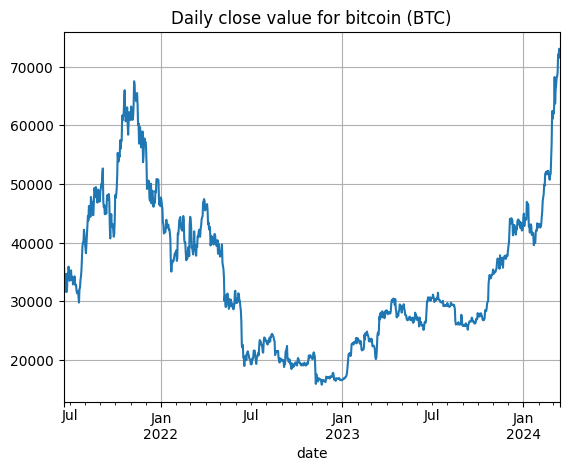

In [167]:
data['4b. close (USD)'].plot()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()